In [1]:
!python -m pip uninstall -y capa_online
!python -m pip install 'git+https://github.com/grosed/capa_online/#egg=capa_online&subdirectory=package'

  Cloning https://github.com/grosed/capa_online/ to /tmp/pip-install-lanl_g9q/capa-online_271c160175aa435f804e1ce0272766ab
  Running command git clone --filter=blob:none --quiet https://github.com/grosed/capa_online/ /tmp/pip-install-lanl_g9q/capa-online_271c160175aa435f804e1ce0272766ab
  Resolved https://github.com/grosed/capa_online/ to commit ae493fe6a6b0a6c575a86fbf87ebce4f18dfc02f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyMonad-2.4.0-py3-none-any.whl.metadata (10 kB)
Using cached PyMonad-2.4.0-py3-none-any.whl (29 kB)
  Created wheel for capa_online: filename=capa_online-1.1.1-py3-none-any.whl size=3956 sha256=a2a14559092852bc9bc52d1c5e8cf454900c42d26639ae59d375a6a7f893fcc5
  Stored in directory: /tmp/pip-ephem-wheel-cache-r3jzvdgv/wheels/38/97/24/8f3a0b13105a57d8452e1ff75281b050f0b4f31833200b81f7
Successfully built capa_online

[notice] A new release of pip is available: 

In [3]:
!python -m pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [25]:
from collections import deque

def changepoint(cost,beta) :
    _,_,_,capacity,_ = cost
    F = class_ordered_function(deque([],maxlen=capacity()))
    cpts = class_ordered_function(deque([],maxlen=capacity()))
    S = (cost,F,cpts)
    def push(x) :
        nonlocal S,beta
        _,_,cpts = S = op(S,x,beta)
        S = scale_F(S)
        return (op_cpts(cpts),cpts)
    return push

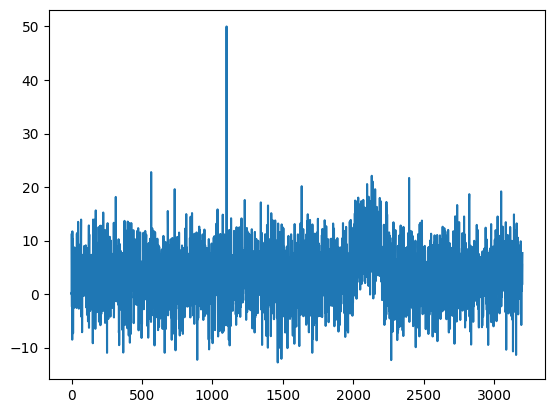

In [4]:
# create a simple example time series
import numpy as np

np.random.seed(1)
Z = [float(z) for z in list(np.random.normal(3, 5, 2000)) + 
    list(np.random.normal(10, 5, 200)) + # collective anomaly
    list(np.random.normal(3, 5, 1000))]
Z[1100] = 50 # point anomaly

# visualise the data
import matplotlib.pyplot as plt

plt.plot(Z)


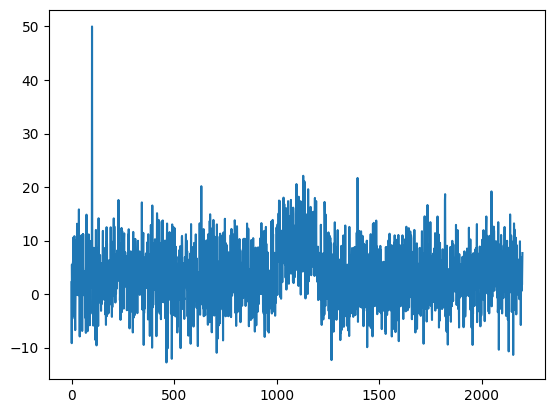

In [5]:
from capa_online import *
from statistics import mean,stdev

burn_in = Z[:1000]
transformer = scale(mean(burn_in),stdev(burn_in))

Z = Z[1000:]

plt.plot(Z)

In [26]:
from math import log
wsize = 2000
cost = normal_mean(wsize)
beta = 4*log(wsize)
scanner = compose(changepoint(cost,beta),transformer)

In [44]:
history = list()
for z in Z[:900] :
    changes = scanner(z)
    history.append(changes)

In [46]:
history[899]

([93, 1200],
 (<function capa_online.utils.class_ordered_function.<locals>.value(i)>,
  <function capa_online.utils.class_ordered_function.<locals>.domain()>,
  <function capa_online.utils.class_ordered_function.<locals>.cardinality()>,
  <function capa_online.utils.class_ordered_function.<locals>.push(val)>,
  <function capa_online.utils.class_ordered_function.<locals>.insert(i, x)>))

In [32]:
history[1500][1][2]()

2001

In [43]:
for i in history[1500][1][1]() :
    print(str(i) + " : " + str(history[1500][1][0](i)))

0 : 199
1 : 200
2 : 201
3 : 202
4 : 203
5 : 204
6 : 205
7 : 206
8 : 207
9 : 208
10 : 209
11 : 210
12 : 211
13 : 212
14 : 213
15 : 214
16 : 215
17 : 216
18 : 217
19 : 218
20 : 219
21 : 220
22 : 221
23 : 222
24 : 223
25 : 224
26 : 225
27 : 226
28 : 227
29 : 228
30 : 229
31 : 230
32 : 231
33 : 232
34 : 233
35 : 234
36 : 235
37 : 236
38 : 237
39 : 238
40 : 239
41 : 240
42 : 241
43 : 242
44 : 243
45 : 244
46 : 245
47 : 246
48 : 247
49 : 248
50 : 249
51 : 250
52 : 251
53 : 252
54 : 253
55 : 254
56 : 255
57 : 256
58 : 257
59 : 258
60 : 259
61 : 260
62 : 261
63 : 262
64 : 263
65 : 264
66 : 265
67 : 266
68 : 267
69 : 268
70 : 269
71 : 270
72 : 271
73 : 272
74 : 273
75 : 274
76 : 275
77 : 276
78 : 277
79 : 278
80 : 279
81 : 280
82 : 281
83 : 282
84 : 283
85 : 284
86 : 285
87 : 286
88 : 287
89 : 288
90 : 289
91 : 290
92 : 291
93 : 292
94 : 293
95 : 294
96 : 295
97 : 296
98 : 297
99 : 298
100 : 299
101 : 300
102 : 301
103 : 302
104 : 303
105 : 304
106 : 305
107 : 306
108 : 307
109 : 308
110 : 309
